In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('stores_1_to_10.csv')
data

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Weekly_Sales,Type,Size,Weekly_Sales.1
0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,1643690.90,A,151315,1643690.90
1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,1641957.44,A,151315,1641957.44
2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,1611968.17,A,151315,1611968.17
3,1,3/12/2010,False,60.71,3.669,8368.50,298.46,1.39,1340.29,224.562029,6.833,1439541.59,A,151315,1439541.59
4,1,3/19/2010,False,64.00,3.734,2588.06,80.89,3.20,909.76,224.716695,6.833,1472515.79,A,151315,1472515.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,10,8/17/2012,False,88.83,4.002,4407.90,0.00,7.20,3037.56,130.790968,7.170,1597868.05,B,126512,1827797.40
385,10,9/7/2012,True,83.07,4.124,11848.88,20.00,47.52,3530.47,130.932548,7.170,1661767.33,B,126512,1708283.28
386,10,9/21/2012,False,81.93,4.125,11273.56,245.91,27.00,2976.50,131.010333,7.170,1671857.57,B,126512,1671857.57
387,10,9/28/2012,False,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170,1437059.26,B,126512,1694862.41


In [3]:
#data.replace(['A','B','C'], [1,2,3], inplace=True)
processed_data = data.drop(['Date', 'Weekly_Sales.1'], axis=1).copy()

In [4]:
features = ['Store','IsHoliday','Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive',
            'CPI','Unemployment','Weekly_Sales','Size']
# Separating out the features
X = processed_data.loc[:, features].values
# Separating out the target
y = processed_data.loc[:,['Type']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal component 1', 'Principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, processed_data[['Type']]], axis = 1)
#finalDf.replace([1,2,3],['A','B','C'], inplace=True)
finalDf

,Principal component 1,Principal component 2,Type
0,1.014563,0.026287,A
1,0.503506,1.933053,A
2,0.045924,0.381435,A
3,0.116166,-0.316457,A
4,-0.250475,-0.384747,A
...,...,...,...
384,0.415279,-1.367621,B
385,1.064155,0.040750,B
386,0.892581,-1.434221,B
387,0.404948,-1.236582,B


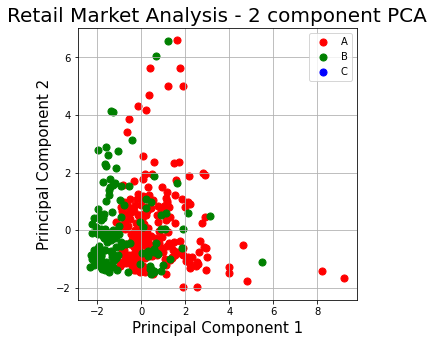

In [15]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail Market Analysis - 2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal component 1']
               , finalDf.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [20]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
res = decision_tree.predict(X_test)
score = accuracy_score(res,y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 1.0


In [21]:
conf_matrix = confusion_matrix(y_test, res, labels=decision_tree.classes_)
conf_matrix

array([[84,  0],
       [ 0, 53]], dtype=int64)

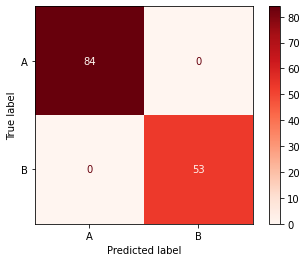

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, res, display_labels=decision_tree.classes_, cmap='Reds')

In [12]:
print(classification_report(y_test, res, labels=decision_tree.classes_))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        84
           B       1.00      1.00      1.00        53

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

